# Decision Tree and Random Forest
In this notebook, we will perform nonparametic method of modeling, including decision tree and random forest, and then evaluate the model's performance.

We obtain metrics to measure the models' performance. We used the following metrics:

- Accuracy: The accuray of a model is the fraction of correct predictions: $\frac{\text{correct predictions}}{\text{total number of data points}}$

- Confusion Matrix: A confusion matrix is a table that is used to visualize the performance of a classification algorithm, with four elements: True Positive, True Negative, False Positve (Type I Error), False Negative (Type II Error)

- ROC Curve: ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).

- Precision Recall Curve: The precision-recall curve is a graph with Precision values ($\frac{TP}{TP+FN}$) on the y-axis and Recall values ($\frac{TP}{TP+FP}$) on the x-axis. It shows the tradeoff between precision and recall for different threshold.

- F1 score: F1 score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc, precision_recall_curve, PrecisionRecallDisplay, f1_score
import pickle
from diagnosis.modelmake import decision_tree, random_forest
from sklearn import tree

## Load the data

In [2]:
train_data = pd.read_csv('../data/train.csv')
val_data = pd.read_csv('../data/val.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
X_train = train_data.drop(labels = ['diagnosis','id'],axis = 1) # drop labels and less predictive features for feature matrix
y_train = train_data['diagnosis']
X_val = val_data.drop(labels = ['diagnosis','id'],axis = 1)
y_val = val_data['diagnosis']

## Decision Tree

The Decision tree algorithm is a supervised learning algorithm that continuously splits data points to form predictions. Every decision tree includes a root node, branches, and leaf nodes. The internal leaf nodes are decision points that describe various test cases whereas the branches represent the outcomes of those decisions. The very bottom nodes in a decision tree give prediction values to the data. A decision tree is an appropriate model for this data as it can be used to solve classification problems such as this one where we are trying to identify whether the cancer is benign or malignant.

### Set Model

In [4]:
# set the model and get the prediction
model_dt, y_pred_train_dt, y_pred_val_dt = decision_tree(X_train, y_train, X_val)

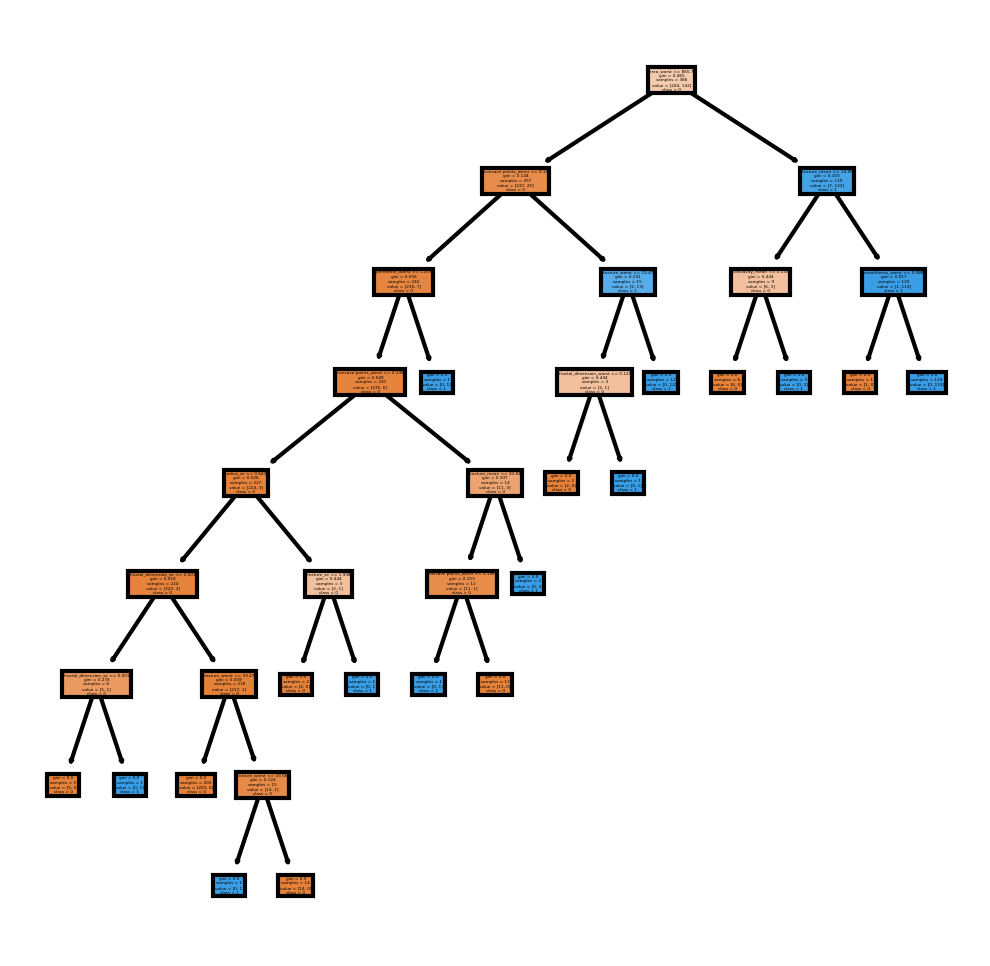

In [5]:
# visualize decision tree
fn=list(X_train.columns)
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_dt,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.savefig('../figures/decision_tree.png', bbox_inches = 'tight');

### Metrics

#### Accuracy

In [6]:
# accuracy of decision tree model
dt_score = model_dt.score(X_val, y_val)
print("Decision Tree Model Accuracy: ", dt_score)

Decision Tree Model Accuracy:  0.9381443298969072


#### Confusion Matrix

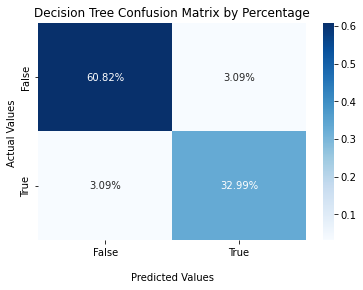

In [7]:
#Decision Tree Confusion Matrix

cf_matrix_dt = confusion_matrix(y_val, y_pred_val_dt)

ax2 = sns.heatmap(cf_matrix_dt/np.sum(cf_matrix_dt), annot=True, 
            fmt='.2%', cmap='Blues')

ax2.set_title('Decision Tree Confusion Matrix by Percentage');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');

ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])

plt.savefig('../figures/confusion_matrix_dt.png', bbox_inches = 'tight')
plt.show()

#### ROC Curve

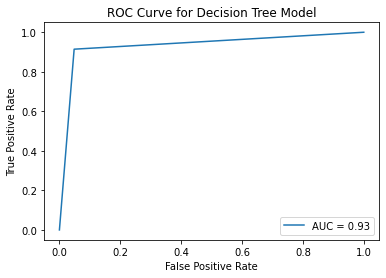

In [8]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_dt)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title("ROC Curve for Decision Tree Model")

plt.savefig('../figures/roc_curve_dt.png')
plt.show();

#### Precision Recall Curve 

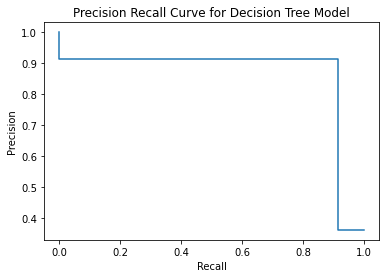

In [9]:
precision, recall, _ = precision_recall_curve(y_val, y_pred_val_dt)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision Recall Curve for Decision Tree Model")

plt.savefig('../figures/precision_recall_curve_dt.png')
plt.show();

#### F1 Score

In [10]:
f1_score_dt = f1_score(y_val, y_pred_val_dt)
f1_score_dt

0.9142857142857143

## Random Forest

The Random Forest algorithm builds on the decision tree algorithm by creating multiple decision trees. Each tree is then trained on a randomly drawn sample from the data. Each tree constructed does not consider every feature as a potential split point. The algorithm then averages the predictions across all the decision trees. Random Forest is an appropriate model for this data because like a decision tree, it can be used for classification problems. Furthermore, it can be a better fit than a single decision tree because random sampling and averaging across models help overcome overfitting and allows for more generalization.

### Set Model

In [11]:
# set the model and get the prediction
model_rf, y_pred_train_rf, y_pred_val_rf = random_forest(X_train, y_train, X_val, 5)

### Metrics

#### Accuracy

In [12]:
# accuracy of decision tree model
rf_score = model_rf.score(X_val, y_val)
print("Random Forest Model Accuracy: ", rf_score)

Random Forest Model Accuracy:  0.9587628865979382


#### Confusion Matrix

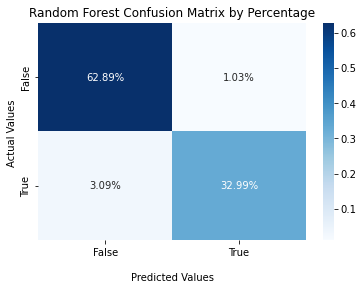

In [13]:
#Decision Tree Confusion Matrix

cf_matrix_rf = confusion_matrix(y_val, y_pred_val_rf)

ax2 = sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, 
            fmt='.2%', cmap='Blues')

ax2.set_title('Random Forest Confusion Matrix by Percentage');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');

ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])

plt.savefig('../figures/confusion_matrix_rf.png', bbox_inches = 'tight')
plt.show();

#### ROC Curve

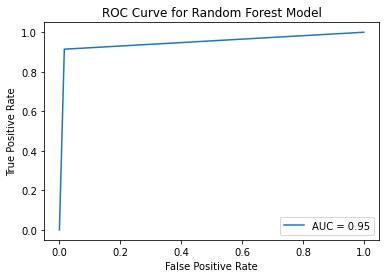

In [14]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_rf)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title("ROC Curve for Random Forest Model")

plt.savefig('../figures/roc_curve_rf.png')
plt.show();

#### Precision Recall Curve 

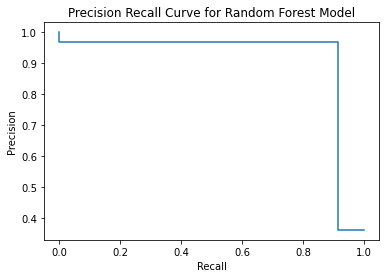

In [15]:
precision, recall, _ = precision_recall_curve(y_val, y_pred_val_rf)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision Recall Curve for Random Forest Model")

plt.savefig('../figures/precision_recall_curve_rf.png')
plt.show();

#### F1 Score

In [16]:
f1_score_rf = f1_score(y_val, y_pred_val_rf)
f1_score_rf

0.9411764705882354

By comparing metrics of two models, the random forest model has higher accuracy and f1 score. Therefore, we will pick random forest model as a better one using non-parametric method.

We save the random forest model in order to compare it with parametric model.

In [17]:
# save the model to disk
filename = 'rf_model.sav'
pickle.dump(model_rf, open(filename, 'wb'))